In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas
import cv2
import json
from tqdm import tqdm
import os
import scipy.ndimage

Training sequences: 1105 images in total.
- S1L3 Time_14-17: frame_0000.jpg-frame_0090.jpg, 91 images
- S1L3 Time_14-33: frame_0000.jpg-frame_0343.jpg, 344 images
- S2L2 Time_14-55: frame_0003.jpg-frame_0432.jpg, 430 images
- S2L3 Time_14-41: frame_0000.jpg-frame_0239.jpg, 240 images

Testing sequences: 794 images in total.
- S1L1 Time_13-57: frame_0000.jpg-frame_0220.jpg, 221 images
- S1L1 Time_13-59: frame_0000.jpg-frame_0240.jpg, 241 images
- S1L2 Time_14-06: frame_0000.jpg-frame_0200.jpg, 201 images
- S1L2 Time_14-31: frame_0000.jpg-frame_0130.jpg, 131 images

In [2]:
data_path = 'D:/PETS2009'
cam_view = 'GT_density_maps/camera_view'
ground_plane= 'GT_density_maps/ground_plane'
images = 'image_frames'

views = ['view1','view2','view3']
train_path = ['S1L3/14_17','S1L3/14_33','S2L2/14_55','S2L3/14_41']
test_path = ['S1L1/13_57','S1L1/13_59','S1L2/14_06','S1L2/14_31']

In [61]:
def generate_pmap(points_data,img_shape):
    point_img = np.zeros((img_shape[0],img_shape[1]),dtype=float)
    for point in points_data:
        if (point[2]<0 or point[2]>img_shape[1] or point[3]<0 or point[3]>img_shape[0]):
            continue;
        point_img[int(point[3]),int(point[2])]=1  
    return point_img

In [59]:
def generate_dmap(point_img,sigma):
    #kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
    #img_Guassian = cv2.GaussianBlur(point_img,(15,15),5,cv2.BORDER_REFLECT_101)
    #img_Guassian = cv2.filter2D(point_img, -1, kernel)
    img_Guassian = scipy.ndimage.filters.gaussian_filter(point_img, sigma, mode = 'reflect')
    return img_Guassian

In [41]:
def img_norm(img):
    ratio = 255/(img.max()-img.min())
    new_img = (img*ratio).astype(np.uint8)
    #new_max = new_img.max()
    return new_img

## 1.Generate the input images (train and test)

In [17]:
# generate the train dmap dataset and the 
image_test_path = os.path.join(data_path,images,'train',train_path[0],views[0])
print(image_test_path)

# in windows
image_test_path = image_test_path.replace('\\','/')
print(image_test_path)

D:/PETS2009\image_frames\train\S1L3/14_17\view1
D:/PETS2009/image_frames/train/S1L3/14_17/view1


In [22]:
image_list = os.listdir(image_test_path)
print(len(image_list))
print(image_list[0])

91
frame_0000.jpg


In [32]:
image_test = cv2.imread(os.path.join(image_test_path,image_list[0]))
image_test = cv2.cvtColor(image_test,cv2.COLOR_BGR2RGB)
image_test = cv2.resize(image_test,(768//2,576//2))

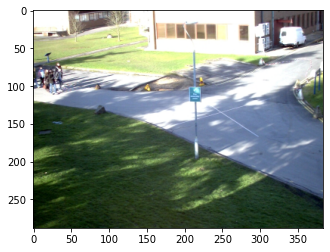

In [33]:
plt.imshow(image_test)

In [34]:
print(image_test.shape)

(288, 384, 3)


In [45]:
train_images = []
for view in views:
    for path in train_path:
        image_path = os.path.join(data_path,images,'train',path,view)
        image_path = image_path.replace('\\','/')
        image_list = os.listdir(image_path)
        for image in tqdm(image_list):
            img = cv2.imread(os.path.join(image_path,image))
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.resize(img,(img.shape[1]//2,img.shape[0]//2))
            train_images.append(img)


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:01<00:00, 133.94it/s]


In [46]:
train_images = np.array(train_images)

In [47]:
print(train_images.shape)

(3315, 288, 384, 3)


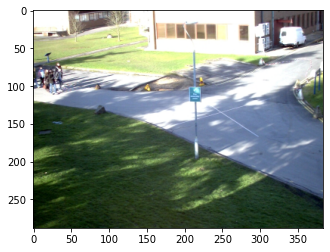

In [48]:
plt.imshow(train_images[0])

In [52]:
file_name = 'train_view1.h5'
if not os.path.exists(os.path.join(data_path,file_name)):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('color_images',data=train_images[0:1105])
f.close()

In [53]:
file_name = 'train_view2.h5'
if not os.path.exists(os.path.join(data_path,file_name)):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('color_images',data=train_images[1105:2210])
f.close()

file_name = 'train_view3.h5'
if not os.path.exists(os.path.join(data_path,file_name)):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('color_images',data=train_images[2210:3315])
f.close()

In [51]:
print(train_images.dtype)

uint8


In [56]:
train_images = []
test_images = []
for view in views:
    for path in test_path:
        image_path = os.path.join(data_path,images,'test',path,view)
        image_path = image_path.replace('\\','/')
        image_list = os.listdir(image_path)
        for image in tqdm(image_list):
            img = cv2.imread(os.path.join(image_path,image))
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.resize(img,(img.shape[1]//2,img.shape[0]//2))
            test_images.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 131/131 [00:00<00:00, 139.66it/s]


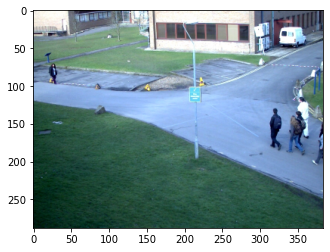

In [57]:
plt.imshow(test_images[0])

In [59]:
test_images = np.array(test_images)
print(test_images.shape)

(2382, 288, 384, 3)


In [60]:
file_name = 'test_view1.h5'
if not os.path.exists(file_name):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('color_images',data=test_images[0:794])
f.close()

file_name = 'test_view2.h5'
if not os.path.exists(file_name):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('color_images',data=test_images[794:1588])
f.close()

file_name = 'test_view3.h5'
if not os.path.exists(file_name):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('color_images',data=test_images[1588:2382])
f.close()

In [36]:
file_path = '/public/xiaoxuayu3/PETS2009/violation_datasets/test/view1.h5'
f = h5py.File(file_path,'r')
print(f.keys())

<KeysViewHDF5 ['color_images']>


In [37]:
imgs = f['color_images']
print(imgs.shape)

(794, 288, 384, 3)


In [38]:
print(imgs.dtype)

uint8


In [39]:
imgs = np.array(imgs,dtype='float32')
print(imgs.shape)
print(imgs.dtype)

(794, 288, 384, 3)
float32


In [40]:
file_name = '/public/xiaoxuayu3/PETS2009/violation_datasets/test/view1_new.h5'
if not os.path.exists(file_name):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('color_images',data=imgs)
f.close()

# 2. Generate the violation density maps

In [81]:
gp_dmap_path = 'D:/PETS2009/GT_density_maps/ground_plane/train/S2L3/14_41/gp_dmap.h5'
gp_dmap = h5py.File(gp_dmap_path,'r')

print(gp_dmap.keys())

<KeysViewHDF5 ['density_maps']>


In [82]:
gp_dmap = gp_dmap['density_maps']

In [83]:
print(gp_dmap.shape)

(240, 710, 610, 1)


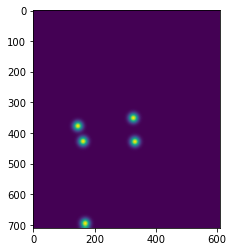

In [109]:
test_dmap = gp_dmap[8]
plt.imshow(test_dmap.squeeze())

In [9]:
gp_label_json = 'D:/PETS2009/labels/S1L3/14_17/gp_pmap.json'
gp_label  = pandas.read_json(gp_label_json)

In [10]:
print(gp_label['frame_0056.jpg']['regions'].keys())

dict_keys(['24', '25', '26', '27', '20', '21', '22', '23', '28', '29', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8', '11', '10', '13', '12', '15', '14', '17', '16', '19', '18', '31', '30', '34', '33', '32'])


In [11]:
def euclid_dis(coord1,coord2):
    dis = np.sqrt(np.sum(np.square(coord1-coord2)))
    return dis

In [86]:
gp_pmap = []
path = train_path[3]

json_path = os.path.join(data_path,'labels',path,'gp_pmap.json')
json_path = json_path.replace('\\','/')
gp_json = pandas.read_json(json_path)

image_path = os.path.join(data_path,images,'train',path,views[0])
image_list = os.listdir(image_path)

for image_name in tqdm(image_list):
    img_id = np.array(image_name[-8:-4]).astype(np.float32)
    #print(img_id)
    points = gp_json[image_name]['regions']
    for point_1 in points.keys(): 
        min_dis = 10000
        cx_1 = points[point_1]['shape_attributes']['cx']
        cy_1 = points[point_1]['shape_attributes']['cy']
        coord1 = np.array([cx_1,cy_1])
        for point_2 in points.keys():
            cx_2 = points[point_2]['shape_attributes']['cx']
            cy_2 = points[point_2]['shape_attributes']['cy']
            coord2 = np.array([cx_2,cy_2])
            dis = euclid_dis(coord1,coord2)
            if (dis<min_dis and dis!=0):
                min_dis = dis
                #print(min_dis)
        p_info = [img_id,int(point_1),cx_1,cy_1,min_dis/10]
        gp_pmap.append(p_info)
        #print(min_dis)

100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:01<00:00, 136.35it/s]


In [87]:
gp_pmap = np.array(gp_pmap)
print(gp_pmap.shape)

(7308, 5)


In [88]:
#print(gp_pmap[0:5])

In [89]:
gp_violation = np.where(gp_pmap[:,4]<=1.5)
print(gp_violation[0].shape)

(6382,)


In [90]:
violation_data = []
for index in gp_violation[0]:
    violation_data.append(gp_pmap[index])

In [91]:
violation_data = np.array(violation_data)
print(violation_data.shape)

(6382, 5)


In [95]:
test = np.where(violation_data[:,0]==1)
print(test[0].shape[0])

0


In [117]:
#test_index = np.where(violation_data[:,0]==72)
#print(test_index[0])
#print(len(image_list))

img_shape = (710,610)
pmap_all = []
dmap_all = []

for i in range(len(image_list)):
    img_index = np.where(violation_data[:,0]==i)
    #print(img_index[0])
    if (img_index[0].shape[0] == 0):
        pmap = np.zeros(img_shape)
        dmap = np.zeros(img_shape)
    else:
        head = img_index[0][0]
        tail = img_index[0][-1]
        #print(tail)
        p_violation = violation_data[head:tail+1]
        #print(p_violation[:,0], ": i")
        pmap = generate_pmap(p_violation,img_shape)
        dmap = generate_dmap(pmap,10)
    pmap_all.append(pmap)
    dmap_all.append(dmap)
dmap_all = np.array(dmap_all,dtype='float32')

(240, 918, 690)


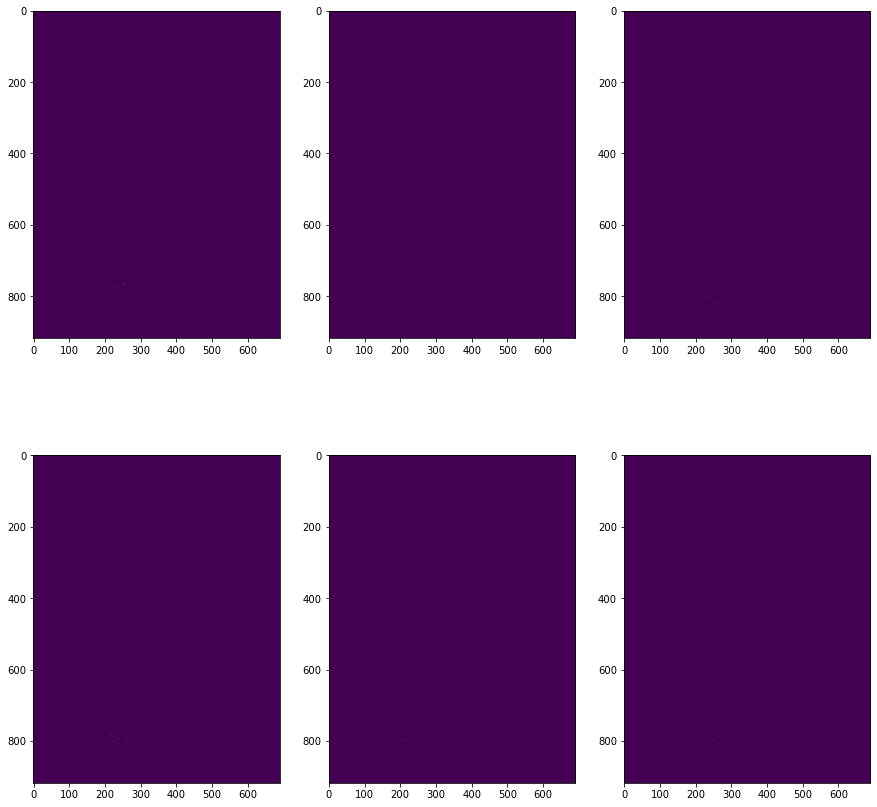

In [118]:
print(dmap_all.shape)
plt.figure(figsize=(15,15))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.imshow(pmap_all[i])

In [50]:
dmap_all_norm = []
for img in dmap_all:
    img = img_norm(img)
    dmap_all_norm.append(img)

dmap_all = np.array(dmap_all_norm)

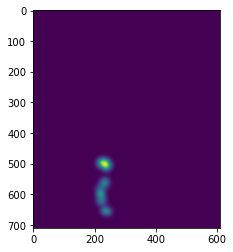

In [53]:
plt.imshow(dmap_all[0])

In [142]:
img_shape = (710,610)
dmap_all = []
pmap_all = []
for path in train_path:
    gp_pmap = []
    json_path = os.path.join(data_path,'labels',path,'gp_pmap.json')
    json_path = json_path.replace('\\','/')
    gp_json = pandas.read_json(json_path)

    image_path = os.path.join(data_path,images,'train',path,views[0])
    image_list = os.listdir(image_path)

    for image_name in tqdm(image_list):
        img_id = np.array(image_name[-8:-4]).astype(np.float32)
        #print(img_id)
        points = gp_json[image_name]['regions']
        for point_1 in points.keys(): 
            min_dis = 10000
            cx_1 = points[point_1]['shape_attributes']['cx']
            cy_1 = points[point_1]['shape_attributes']['cy']
            coord1 = np.array([cx_1,cy_1])
            for point_2 in points.keys():
                cx_2 = points[point_2]['shape_attributes']['cx']
                cy_2 = points[point_2]['shape_attributes']['cy']
                coord2 = np.array([cx_2,cy_2])
                dis = euclid_dis(coord1,coord2)
                if (dis<min_dis and dis!=0):
                    min_dis = dis
            p_info = [img_id,int(point_1),cx_1,cy_1,min_dis/10]
            gp_pmap.append(p_info)
            
    gp_pmap = np.array(gp_pmap)
    gp_violation = np.where(gp_pmap[:,4]<=1.5)
    print(gp_violation[0].shape)

    violation_data = []
    for index in gp_violation[0]:
        violation_data.append(gp_pmap[index])

    violation_data = np.array(violation_data)
    print(violation_data.shape)

    pmap_all_view = []
    dmap_all_view = []

    for i in range(len(image_list)):
        img_index = np.where(violation_data[:,0]==i)
        if (img_index[0].shape[0] == 0):
            pmap = np.zeros(img_shape)
            dmap = np.zeros(img_shape)
        else:
            head = img_index[0][0]
            tail = img_index[0][-1]
            #print(tail)
            p_violation = violation_data[head:tail+1]
            #print(p_violation[:,0], ": i")
            pmap = generate_pmap(p_violation,img_shape)
            dmap = generate_dmap(pmap,10)
        pmap_all_view.append(pmap)
        dmap_all_view.append(dmap)
    pmap_all.append(pmap_all_view)
    dmap_all.append(dmap_all_view)
#dmap_all = np.array(dmap_all,dtype='float32')

100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 131.00it/s]


(2603,)
(2603, 5)


100%|████████████████████████████████████████████████████████████████████████████████| 344/344 [00:03<00:00, 86.54it/s]


(12411,)
(12411, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 430/430 [00:03<00:00, 133.80it/s]


(7770,)
(7770, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:01<00:00, 138.43it/s]


(6382,)
(6382, 5)


In [143]:
dmap_1 = dmap_all[0]
dmap_2 = dmap_all[1]
dmap_3 = dmap_all[2]
dmap_4 = dmap_all[3]

dmap_all_new = dmap_1+dmap_2+dmap_3+dmap_4

In [144]:
dmap_all_train = np.array(dmap_all_new,dtype='float32')

In [145]:
print(dmap_all_train.shape)

(1105, 710, 610)


In [136]:
img_shape = (710,610)
dmap_all = []
pmap_all = []
for path in test_path:
    gp_pmap = []
    json_path = os.path.join(data_path,'labels',path,'gp_pmap.json')
    json_path = json_path.replace('\\','/')
    gp_json = pandas.read_json(json_path)

    image_path = os.path.join(data_path,images,'test',path,views[0])
    image_list = os.listdir(image_path)

    for image_name in tqdm(image_list):
        img_id = np.array(image_name[-8:-4]).astype(np.float32)
        #print(img_id)
        points = gp_json[image_name]['regions']
        for point_1 in points.keys(): 
            min_dis = 10000
            cx_1 = points[point_1]['shape_attributes']['cx']
            cy_1 = points[point_1]['shape_attributes']['cy']
            coord1 = np.array([cx_1,cy_1])
            for point_2 in points.keys():
                cx_2 = points[point_2]['shape_attributes']['cx']
                cy_2 = points[point_2]['shape_attributes']['cy']
                coord2 = np.array([cx_2,cy_2])
                dis = euclid_dis(coord1,coord2)
                if (dis<min_dis and dis!=0):
                    min_dis = dis
            p_info = [img_id,int(point_1),cx_1,cy_1,min_dis/10]
            gp_pmap.append(p_info)
            
    gp_pmap = np.array(gp_pmap)
    gp_violation = np.where(gp_pmap[:,4]<=1.5)
    print(gp_violation[0].shape)

    violation_data = []
    for index in gp_violation[0]:
        violation_data.append(gp_pmap[index])

    violation_data = np.array(violation_data)
    print(violation_data.shape)

    pmap_all_view = []
    dmap_all_view = []

    for i in range(len(image_list)):
        img_index = np.where(violation_data[:,0]==i)
        if (img_index[0].shape[0] == 0):
            pmap = np.zeros(img_shape)
            dmap = np.zeros(img_shape)
        else:
            head = img_index[0][0]
            tail = img_index[0][-1]
            #print(tail)
            p_violation = violation_data[head:tail+1]
            #print(p_violation[:,0], ": i")
            pmap = generate_pmap(p_violation,img_shape)
            dmap = generate_dmap(pmap,10)
        pmap_all_view.append(pmap)
        dmap_all_view.append(dmap)
    pmap_all.append(pmap_all_view)
    dmap_all.append(dmap_all_view)
#dmap_all = np.array(dmap_all,dtype='float32')

100%|███████████████████████████████████████████████████████████████████████████████| 221/221 [00:02<00:00, 109.60it/s]


(6646,)
(6646, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 241/241 [00:01<00:00, 126.94it/s]


(5429,)
(5429, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 201/201 [00:01<00:00, 132.82it/s]


(5878,)
(5878, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 131/131 [00:01<00:00, 108.59it/s]


(4205,)
(4205, 5)


In [137]:
dmap_1 = dmap_all[0]
dmap_2 = dmap_all[1]
dmap_3 = dmap_all[2]
dmap_4 = dmap_all[3]

dmap_all_new = dmap_1+dmap_2+dmap_3+dmap_4

In [140]:
dmap_all_test = np.array(dmap_all_new,dtype='float32')

In [141]:
print(dmap_all_test.shape)

(794, 710, 610)


In [147]:
file_name = 'train/gp_violations.h5'
if not os.path.exists(file_name):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('density_maps',data=dmap_all_train)
f.close()


file_name = 'test/gp_violations.h5'
if not os.path.exists(file_name):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('density_maps',data=dmap_all_test)
f.close()


In [151]:
img_shape = (710,610)
dmap_all = []
pmap_all = []
for path in train_path:
    gp_pmap = []
    json_path = os.path.join(data_path,'labels',path,'gp_pmap.json')
    json_path = json_path.replace('\\','/')
    gp_json = pandas.read_json(json_path)

    image_path = os.path.join(data_path,images,'train',path,views[0])
    image_list = os.listdir(image_path)

    for image_name in tqdm(image_list):
        img_id = np.array(image_name[-8:-4]).astype(np.float32)
        #print(img_id)
        points = gp_json[image_name]['regions']
        for point_1 in points.keys(): 
            min_dis = 10000
            cx_1 = points[point_1]['shape_attributes']['cx']
            cy_1 = points[point_1]['shape_attributes']['cy']
            coord1 = np.array([cx_1,cy_1])
            for point_2 in points.keys():
                cx_2 = points[point_2]['shape_attributes']['cx']
                cy_2 = points[point_2]['shape_attributes']['cy']
                coord2 = np.array([cx_2,cy_2])
                dis = euclid_dis(coord1,coord2)
                if (dis<min_dis and dis!=0):
                    min_dis = dis
            p_info = [img_id,int(point_1),cx_1,cy_1,min_dis/10]
            gp_pmap.append(p_info)
            
    gp_pmap = np.array(gp_pmap)
    gp_violation = np.where(gp_pmap[:,4]<=1.5)
    print(gp_violation[0].shape)

    violation_data = []
    for index in gp_violation[0]:
        violation_data.append(gp_pmap[index])

    violation_data = np.array(violation_data)
    print(violation_data.shape)

    pmap_all_view = []
    dmap_all_view = []

    for i in range(len(image_list)):
        img_index = np.where(violation_data[:,0]==i)
        if (img_index[0].shape[0] == 0):
            pmap = np.zeros(img_shape)
            dmap = np.zeros(img_shape)
        else:
            head = img_index[0][0]
            tail = img_index[0][-1]
            #print(tail)
            p_violation = violation_data[head:tail+1]
            #print(p_violation[:,0], ": i")
            pmap = generate_pmap(p_violation,img_shape)
            dmap = generate_dmap(pmap,15)
        pmap_all_view.append(pmap)
        dmap_all_view.append(dmap)
    pmap_all.append(pmap_all_view)
    dmap_all.append(dmap_all_view)
#dmap_all = np.array(dmap_all,dtype='float32')
dmap_1 = dmap_all[0]
dmap_2 = dmap_all[1]
dmap_3 = dmap_all[2]
dmap_4 = dmap_all[3]

dmap_all_new = dmap_1+dmap_2+dmap_3+dmap_4
dmap_all_train = np.array(dmap_all_new,dtype='float32')

100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 132.57it/s]


(2603,)
(2603, 5)


100%|████████████████████████████████████████████████████████████████████████████████| 344/344 [00:03<00:00, 87.09it/s]


(12411,)
(12411, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 430/430 [00:03<00:00, 135.48it/s]


(7770,)
(7770, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:01<00:00, 142.86it/s]


(6382,)
(6382, 5)


In [152]:
img_shape = (710,610)
dmap_all = []
pmap_all = []
for path in test_path:
    gp_pmap = []
    json_path = os.path.join(data_path,'labels',path,'gp_pmap.json')
    json_path = json_path.replace('\\','/')
    gp_json = pandas.read_json(json_path)

    image_path = os.path.join(data_path,images,'test',path,views[0])
    image_list = os.listdir(image_path)

    for image_name in tqdm(image_list):
        img_id = np.array(image_name[-8:-4]).astype(np.float32)
        #print(img_id)
        points = gp_json[image_name]['regions']
        for point_1 in points.keys(): 
            min_dis = 10000
            cx_1 = points[point_1]['shape_attributes']['cx']
            cy_1 = points[point_1]['shape_attributes']['cy']
            coord1 = np.array([cx_1,cy_1])
            for point_2 in points.keys():
                cx_2 = points[point_2]['shape_attributes']['cx']
                cy_2 = points[point_2]['shape_attributes']['cy']
                coord2 = np.array([cx_2,cy_2])
                dis = euclid_dis(coord1,coord2)
                if (dis<min_dis and dis!=0):
                    min_dis = dis
            p_info = [img_id,int(point_1),cx_1,cy_1,min_dis/10]
            gp_pmap.append(p_info)
            
    gp_pmap = np.array(gp_pmap)
    gp_violation = np.where(gp_pmap[:,4]<=1.5)
    print(gp_violation[0].shape)

    violation_data = []
    for index in gp_violation[0]:
        violation_data.append(gp_pmap[index])

    violation_data = np.array(violation_data)
    print(violation_data.shape)

    pmap_all_view = []
    dmap_all_view = []

    for i in range(len(image_list)):
        img_index = np.where(violation_data[:,0]==i)
        if (img_index[0].shape[0] == 0):
            pmap = np.zeros(img_shape)
            dmap = np.zeros(img_shape)
        else:
            head = img_index[0][0]
            tail = img_index[0][-1]
            #print(tail)
            p_violation = violation_data[head:tail+1]
            #print(p_violation[:,0], ": i")
            pmap = generate_pmap(p_violation,img_shape)
            dmap = generate_dmap(pmap,15)
        pmap_all_view.append(pmap)
        dmap_all_view.append(dmap)
    pmap_all.append(pmap_all_view)
    dmap_all.append(dmap_all_view)

dmap_1 = dmap_all[0]
dmap_2 = dmap_all[1]
dmap_3 = dmap_all[2]
dmap_4 = dmap_all[3]

dmap_all_new = dmap_1+dmap_2+dmap_3+dmap_4
dmap_all_test = np.array(dmap_all_new,dtype='float32')

100%|███████████████████████████████████████████████████████████████████████████████| 221/221 [00:02<00:00, 107.59it/s]


(6646,)
(6646, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 241/241 [00:01<00:00, 150.57it/s]


(5429,)
(5429, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 201/201 [00:01<00:00, 135.62it/s]


(5878,)
(5878, 5)


100%|███████████████████████████████████████████████████████████████████████████████| 131/131 [00:01<00:00, 106.98it/s]


(4205,)
(4205, 5)


In [171]:
vmap_train = []
for dmap in tqdm(dmap_all_train):
    dmap = img_norm(dmap)
    if(dmap.max()==0):
        dmap[:,:]=1
    else:
        dmap[dmap<35]=1
        dmap[dmap>=35]=0
    vmap_train.append(dmap)
vmap_train = np.array(vmap_train,dtype='b')

 35%|███████████████████████████▎                                                  | 387/1105 [00:00<00:01, 553.96it/s]<ipython-input-41-1dd927096f62>:2: RuntimeWarning: divide by zero encountered in true_divide
  ratio = 255/(img.max()-img.min())
<ipython-input-41-1dd927096f62>:3: RuntimeWarning: invalid value encountered in multiply
  new_img = (img*ratio).astype(np.uint8)
100%|█████████████████████████████████████████████████████████████████████████████| 1105/1105 [00:01<00:00, 556.47it/s]


In [172]:
print(vmap_train.shape)

(1105, 710, 610)


In [175]:
print(vmap_train[880])

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


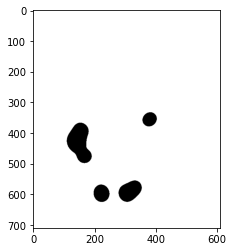

In [179]:
plt.imshow(vmap_train[100],cmap='gray')

In [180]:
vmap_test = []
for dmap in tqdm(dmap_all_test):
    dmap = img_norm(dmap)
    if(dmap.max()==0):
        dmap[:,:]=1
    else:
        dmap[dmap<35]=1
        dmap[dmap>=35]=0
    vmap_test.append(dmap)
vmap_test = np.array(vmap_test,dtype='b')

100%|███████████████████████████████████████████████████████████████████████████████| 794/794 [00:01<00:00, 552.33it/s]


In [182]:
print(vmap_test.shape)

(794, 710, 610)


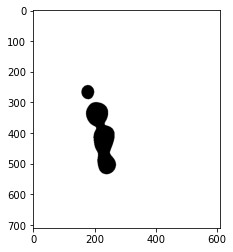

In [183]:
plt.imshow(vmap_test[100],cmap='gray')

In [184]:
file_name = 'train/gp_violations.h5'
if not os.path.exists(file_name):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('segment_maps',data=vmap_train)
f.close()

In [185]:
file_name = 'test/gp_violations.h5'
if not os.path.exists(file_name):
    f= h5py.File(file_name,'w')
else:
    f = h5py.File(file_name,'a')
f.create_dataset('segment_maps',data=vmap_test)
f.close()